<html> <img style="float:center; margin: 0px 0px 0px 0px;" src="https://docs.google.com/uc? export=download&id=1jIxUCriI-tyCAkUYHz05rk5SY_rTHRV9" width="220" align="left"/> </html> 

<figure>
<center>
<img src='https://docs.google.com/uc?export=download&id=1BmLEthy7KCNsnVFviFKX77zLmFhc47XZ' align='right'width="220"/>
    
<figcaption>

</figcaption></center>
</figure>
<center> <H1> Analyse et Programmation avec Python </H1> </center>



Enseignant : Jaafar Chaaouri

Email: Jaafar.chaaouri@fsm.rnu.tn

---

# **Analyse des ventes**

## Introduction

Dans le cadre de ce projet, nous souhaitons réaliser une analyse des données d'une plateforme de e-commerce fictive afin de déterminer de nouvelles stratégies marketing. Pour ce faire, il faut d'abord restructuré et nettoyé les données issues du SI et les analysées selon trois axes.

- Etudier l'évolution du chiffre d'affaires au cours du temps afin de déterminer des effets saisonniers et d'éventuels produits régulateurs.

- Analyser la distribution des catégories de produits et la proportion des ventes de chaque produit..

- Enfin, examiner les corrélations entre l'âge, le genre(H/F), les dépenses, les fréquences d'achats et le panier des clients. Cela nous permettra d'établir trois profils types de clients détaillés et de suggérer des stratégies de ventes.






Organisation des sources


- dataset : les données initiales du projet
- clean_dataset : les données nettoyées du projet
- preparation_de_donnees.ipynb : récupère les données de dataset, les nettoie, et enregistre le résultat dans  clean_dataset
- analyse_de_donnees.ipynb : analyse les données qu'il y a dans clean_dataset






---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
#import functions as f
import calendar
import math

# **Préparation des données**

# Découverte des données

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
c = pd.read_csv("/content/drive/My Drive/customers.csv")
p = pd.read_csv("/content/drive/My Drive/products.csv")
t = pd.read_csv("/content/drive/My Drive/transactions.csv")

In [ ]:
c.shape

(8623, 3)

In [ ]:
c.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [ ]:
c.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [ ]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


### `customers`

Contient **~8600** clients

colonnes :
- `client_id` est une clef primaire
- `sex` : **f** ou **m** (52% et 48%)
- `birth`: 1929 -> 2004

Autres :
- pas de valeurs nulles

In [ ]:
c.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [ ]:
c['sex'].value_counts()

f    4491
m    4132
Name: sex, dtype: int64

In [ ]:
 c.sex[0:3]   
     
# ou c['sex'].head()

0    f
1    f
2    f
Name: sex, dtype: object

### `products`

In [ ]:
p.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [ ]:
# p.shape 
p.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [ ]:
p.count()

id_prod    3287
price      3287
categ      3287
dtype: int64

In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [ ]:
p.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [ ]:
p.head(2)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0


Contient **~3200** produits

colonnes :
- `id_prod`: clef primaire
- `categ`: 0, 1 ou 2 (70%, 23%, 7%)

Autres :
- pas de valeurs nulles

In [ ]:
# p['categ'].describe() 
p['categ'].value_counts() 

0    2309
1     739
2     239
Name: categ, dtype: int64

### `Transactions`

il y a **~340 000** transactions

In [ ]:
t.head(2)

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277


Colonnes :
- `id_prod` : id du produit acheté
- `client_id` : id de l'acheteur
- `session_id` : la session pendant laquelle laquelle le client a acheté
- `date` : la date d'achat

Autre :
 - il n'y a pas de valeurs nulles
 - Il y a un utilisateur par sessions (sauf pour s_0 qui a ct_0 et ct_1). Mais un utilisateur peut avoir plusieurs sessions
 - ct_0 et ct_1 posent problème.
    - Ils ont acheté T_0 126 fois à partir de la meme session (s_0) a ~2021-03-01 02:30:02.2374.

In [ ]:
t.describe()

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


In [ ]:
t

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [ ]:
t.iloc[d:f:p]

In [ ]:
t.shape

(337016, 4)

In [ ]:
# Accès indicé aux données d'un DataFrame 
t.iloc[::10,]
# t.shape

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
10,0_423,2021-10-09 23:50:33.907269,s_102501,c_2225
20,1_333,2021-12-17 06:22:03.132127,s_135611,c_615
30,1_348,2021-11-10 22:00:16.549071,s_117707,c_2954
40,0_1420,2021-04-18 02:28:31.024271,s_22109,c_8444
...,...,...,...,...
336970,0_2122,2021-12-16 02:28:24.747755,s_135033,c_4788
336980,0_1052,2022-02-10 09:19:00.677407,s_162866,c_7949
336990,0_1047,2021-11-24 13:59:04.499331,s_124402,c_7925
337000,2_147,2021-03-22 23:59:52.476912,s_10118,c_998


In [ ]:

t.loc[t['session_id']=='s_0']


,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


# Jointure

On fait une  jointure externe pour sauvegarder l'ensembles des produits / clients qui n'ont pas de transactions

In [ ]:
p.shape

(3287, 3)

In [ ]:
# jointure des transac vers les produits
df = pd.merge(left=p,right=t,how='outer',on='id_prod')


In [ ]:
df.head()

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0.0,2021-05-12 23:26:29.885083,s_33709,c_7954
1,0_1421,19.99,0.0,2022-01-25 11:27:39.357012,s_154957,c_254
2,0_1421,19.99,0.0,2022-01-02 22:29:33.796003,s_144068,c_5770
3,0_1421,19.99,0.0,2021-03-05 17:10:40.265676,s_2187,c_1455
4,0_1421,19.99,0.0,2021-03-29 13:55:04.422637,s_13112,c_2768


In [ ]:
df.count()

id_prod       337038
price         336935
categ         336935
date          337016
session_id    337016
client_id     337016
dtype: int64

In [ ]:
# jointures des transac/prod vers c
df = pd.merge(left=c,right=df, how='outer',on='client_id')

In [ ]:
df[::10]

,client_id,sex,birth,id_prod,price,categ,date,session_id
0,c_4410,f,1967.0,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707
10,c_4410,f,1967.0,0_1054,8.11,0.0,2021-10-01 13:16:27.958827,s_98432
20,c_4410,f,1967.0,0_1277,7.99,0.0,2021-09-25 00:03:39.156997,s_94984
30,c_4410,f,1967.0,1_436,11.76,1.0,2022-01-04 06:28:01.154886,s_144717
40,c_7839,f,1975.0,1_448,13.79,1.0,2021-07-05 03:15:20.314263,s_58025
...,...,...,...,...,...,...,...,...
337010,c_5643,f,1968.0,1_701,26.99,1.0,2021-08-20 17:11:29.549864,s_78387
337020,c_84,f,1982.0,1_343,27.99,1.0,2021-04-13 03:59:33.614841,s_19845
337030,c_84,f,1982.0,0_1113,16.99,0.0,2021-04-13 04:10:27.679097,s_19845
337040,NaN,NaN,NaN,0_1119,2.99,0.0,NaN,NaN


In [ ]:
# renommage des colonnes
#	sex	birth	id_prod	price	categ	date	session_id
df =df.rename(columns={'client_id':'c_id','sex':'c_sex','birth':'c_birth','id_prod':'p_id','price':'p_price','categ':'p_cat','date':'t_date','session_id':'t_sess_id'})

In [ ]:
df

,c_id,c_sex,c_birth,p_id,p_price,p_cat,t_date,t_sess_id
0,c_4410,f,1967.0,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707
1,c_4410,f,1967.0,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715
2,c_4410,f,1967.0,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707
3,c_4410,f,1967.0,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236
4,c_4410,f,1967.0,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740
...,...,...,...,...,...,...,...,...
337054,NaN,NaN,NaN,0_525,2.99,0.0,NaN,NaN
337055,NaN,NaN,NaN,2_86,132.36,2.0,NaN,NaN
337056,NaN,NaN,NaN,0_299,22.99,0.0,NaN,NaN
337057,NaN,NaN,NaN,0_510,23.66,0.0,NaN,NaN


In [ ]:
# renommage des colonnes
#df.rename(columns={'c_id','c_sex','c_birth','p_id','p_price','p_cat','t_date','t_sess_id'})
#df= df[['c_id','c_sex','c_birth','p_id','p_price','p_cat','t_date','t_sess_id']]

In [ ]:
df.head()

,c_id,c_sex,c_birth,p_id,p_price,p_cat,t_date,t_sess_id
0,c_4410,f,1967.0,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707
1,c_4410,f,1967.0,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715
2,c_4410,f,1967.0,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707
3,c_4410,f,1967.0,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236
4,c_4410,f,1967.0,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740


In [ ]:
df.c_id.isin([])

0         False
1         False
2         False
3         False
4         False
          ...  
337054    False
337055    False
337056    False
337057    False
337058    False
Name: c_id, Length: 337059, dtype: bool

In [ ]:
df.c_id.isin(['ct_0', 'ct_1'])   # bool 

0         False
1         False
2         False
3         False
4         False
          ...  
337054    False
337055    False
337056    False
337057    False
337058    False
Name: c_id, Length: 337059, dtype: bool

In [ ]:
df[df.c_id.isin(['ct_0', 'ct_1'])]

,c_id,c_sex,c_birth,p_id,p_price,p_cat,t_date,t_sess_id
108190,ct_0,f,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237441,s_0
108191,ct_0,f,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237443,s_0
108192,ct_0,f,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237442,s_0
108193,ct_0,f,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237426,s_0
108194,ct_0,f,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237434,s_0
...,...,...,...,...,...,...,...,...
332798,ct_1,m,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237416,s_0
332799,ct_1,m,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237425,s_0
332800,ct_1,m,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237423,s_0
332801,ct_1,m,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237421,s_0


In [ ]:
df.head()   
df.tail() 
df.sample()
df[df.c_id.isin(['ct_0', 'ct_1'])].sample(3)

,c_id,c_sex,c_birth,p_id,p_price,p_cat,t_date,t_sess_id
332731,ct_1,m,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237425,s_0
332741,ct_1,m,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237437,s_0
108190,ct_0,f,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237441,s_0


In [ ]:
df.shape

(337059, 8)

In [ ]:
df['c_id'].value_counts()

c_1609    12855
c_6714     4473
c_3454     3275
c_4958     2562
c_7959      195
          ...  
c_90          1
c_8114        1
c_712         1
c_3923        1
c_7534        1
Name: c_id, Length: 8623, dtype: int64

#### Y a-t-il des valeurs `NaN` ?

In [ ]:
df.isnull().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
337054     True
337055     True
337056     True
337057     True
337058     True
Length: 337059, dtype: bool

In [ ]:
df_na = df.loc[df.isnull().any(axis=1)]

In [ ]:
df_na

,c_id,c_sex,c_birth,p_id,p_price,p_cat,t_date,t_sess_id
2678,c_4505,m,1976.0,0_2245,NaN,NaN,2022-01-09 09:23:31.000720,s_147220
2968,c_3468,f,1981.0,0_2245,NaN,NaN,2021-09-11 10:52:05.205583,s_88251
6683,c_1403,f,1978.0,0_2245,NaN,NaN,2022-02-15 14:26:50.187952,s_165575
8386,c_3065,f,1977.0,0_2245,NaN,NaN,2022-01-26 13:34:33.440366,s_155484
9457,c_7102,m,1983.0,0_2245,NaN,NaN,2021-04-25 19:58:42.716401,s_25704
...,...,...,...,...,...,...,...,...
337054,NaN,NaN,NaN,0_525,2.99,0.0,NaN,NaN
337055,NaN,NaN,NaN,2_86,132.36,2.0,NaN,NaN
337056,NaN,NaN,NaN,0_299,22.99,0.0,NaN,NaN
337057,NaN,NaN,NaN,0_510,23.66,0.0,NaN,NaN


In [ ]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 2678 to 337058
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   c_id       124 non-null    object 
 1   c_sex      124 non-null    object 
 2   c_birth    124 non-null    float64
 3   p_id       125 non-null    object 
 4   p_price    22 non-null     float64
 5   p_cat      22 non-null     float64
 6   t_date     103 non-null    object 
 7   t_sess_id  103 non-null    object 
dtypes: float64(3), object(5)
memory usage: 10.3+ KB


In [ ]:
df.c_id.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
337054     True
337055     True
337056     True
337057     True
337058     True
Name: c_id, Length: 337059, dtype: bool

In [ ]:
p_invendus_id = df_na.loc[df.c_id.isnull(), 'p_id'].unique()

In [ ]:
p_invendus_id

array(['0_1016', '0_1780', '0_1062', '0_1119', '0_1014', '1_0', '0_1318',
       '0_1800', '0_1645', '0_322', '0_1620', '0_1025', '2_87', '1_394',
       '2_72', '0_310', '0_1624', '0_525', '2_86', '0_299', '0_510',
       '0_2308'], dtype=object)

In [ ]:
p_invendus_id.shape

(22,)

In [ ]:
c_ss_achat_id = df_na.loc[df.p_id.isnull(), 'c_id'].unique()
c_ss_achat_id.shape 

(21,)

- 22 produits sur 3289 n'ont jamais été vendus
- 21 clients sur 8624 n'ont jamais acheté

# Nettoyage des données

#### On ajoute une colonne 'data_info'

elle donne des infos supplémentaire sur les données de la ligne (`NaN` par défaut) 

In [ ]:
df['data_info'] = np.nan

#### Suppression des valeurs de tests

Les valeurs de tests :
 - les clients sont ct_0 ou ct_1
 - la session de la transaction est s_0
 - les dates de la trans comences par 'test'
 - les produits acheté T_0, coutent -1 
 
 --> on les supprime

In [ ]:
df2 = df.loc[(df.c_id.notnull() & (df.c_id.str.contains('ct')))]
df2

,c_id,c_sex,c_birth,p_id,p_price,p_cat,t_date,t_sess_id,data_info
108190,ct_0,f,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237441,s_0,NaN
108191,ct_0,f,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237443,s_0,NaN
108192,ct_0,f,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237442,s_0,NaN
108193,ct_0,f,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237426,s_0,NaN
108194,ct_0,f,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237434,s_0,NaN
...,...,...,...,...,...,...,...,...,...
332798,ct_1,m,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237416,s_0,NaN
332799,ct_1,m,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237425,s_0,NaN
332800,ct_1,m,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237423,s_0,NaN
332801,ct_1,m,2001.0,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237421,s_0,NaN


In [ ]:

df = df.loc[~(df.c_id.notnull() & (df.c_id.str.contains('ct')))]

In [ ]:
df.shape

(336859, 9)

#### Le produit `0_2245` est dans des transactions mais n'est pas dans produits

In [ ]:
df[df['p_id']=='0_2245']

,c_id,c_sex,c_birth,p_id,p_price,p_cat,t_date,t_sess_id,data_info
2678,c_4505,m,1976.0,0_2245,NaN,NaN,2022-01-09 09:23:31.000720,s_147220,NaN
2968,c_3468,f,1981.0,0_2245,NaN,NaN,2021-09-11 10:52:05.205583,s_88251,NaN
6683,c_1403,f,1978.0,0_2245,NaN,NaN,2022-02-15 14:26:50.187952,s_165575,NaN
8386,c_3065,f,1977.0,0_2245,NaN,NaN,2022-01-26 13:34:33.440366,s_155484,NaN
9457,c_7102,m,1983.0,0_2245,NaN,NaN,2021-04-25 19:58:42.716401,s_25704,NaN
...,...,...,...,...,...,...,...,...,...
328828,c_8138,f,1984.0,0_2245,NaN,NaN,2021-10-04 21:20:27.540982,s_100047,NaN
328958,c_7416,m,1933.0,0_2245,NaN,NaN,2021-11-12 09:25:22.905886,s_118458,NaN
330551,c_4283,f,1976.0,0_2245,NaN,NaN,2021-09-01 02:46:38.931757,s_83377,NaN
333352,c_6236,f,1976.0,0_2245,NaN,NaN,2022-02-25 00:08:08.736068,s_170426,NaN


le prermier caractère de l'id correspond t'il a la catégorie ?

In [ ]:
test = df[['p_id', 'p_cat']].copy()
test['equal'] = test['p_id'].str[0] == test['p_cat'].astype(str).str[0]
test

,p_id,p_cat,equal
0,1_385,1.0,True
1,0_1110,0.0,True
2,0_1111,0.0,True
3,1_461,1.0,True
4,1_536,1.0,True
...,...,...,...
337054,0_525,0.0,True
337055,2_86,2.0,True
337056,0_299,0.0,True
337057,0_510,0.0,True


In [ ]:
test[test['p_id'].notnull()& test['p_cat'].notnull()].equal.all()

True

--> oui on peut donc faire une imputation de la catégorie a partir de l'id

In [ ]:
# imputation de la catégorie
cat = 0
df.loc[df.p_id=='0_2245', 'p_cat'] = cat

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Et l'on peut imputer le prix par la moyenne de la catégorie

In [ ]:
cat1_price_mean = df.loc[df.p_cat == cat, 'p_price'].mean()
df.loc[df.p_id=='0_2245', 'p_price'] = cat1_price_mean

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
df[df['p_id']=='0_2245']

,c_id,c_sex,c_birth,p_id,p_price,p_cat,t_date,t_sess_id,data_info
2678,c_4505,m,1976.0,0_2245,10.647072,0.0,2022-01-09 09:23:31.000720,s_147220,NaN
2968,c_3468,f,1981.0,0_2245,10.647072,0.0,2021-09-11 10:52:05.205583,s_88251,NaN
6683,c_1403,f,1978.0,0_2245,10.647072,0.0,2022-02-15 14:26:50.187952,s_165575,NaN
8386,c_3065,f,1977.0,0_2245,10.647072,0.0,2022-01-26 13:34:33.440366,s_155484,NaN
9457,c_7102,m,1983.0,0_2245,10.647072,0.0,2021-04-25 19:58:42.716401,s_25704,NaN
...,...,...,...,...,...,...,...,...,...
328828,c_8138,f,1984.0,0_2245,10.647072,0.0,2021-10-04 21:20:27.540982,s_100047,NaN
328958,c_7416,m,1933.0,0_2245,10.647072,0.0,2021-11-12 09:25:22.905886,s_118458,NaN
330551,c_4283,f,1976.0,0_2245,10.647072,0.0,2021-09-01 02:46:38.931757,s_83377,NaN
333352,c_6236,f,1976.0,0_2245,10.647072,0.0,2022-02-25 00:08:08.736068,s_170426,NaN


In [ ]:
df.loc[df.p_id=='0_2245', 'data_info'] = 'prod_imputation'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
df.loc[df.p_id=='0_2245', ['p_id', 'p_cat', 'p_price']].drop_duplicates()

,p_id,p_cat,p_price
2678,0_2245,0.0,10.647072


#### On transforme les date en objets *Date*

In [ ]:
def toDate(val):
    if pd.isnull(val):
        return val
    else:
        return datetime.strptime(val, '%Y-%m-%d %H:%M:%S.%f')

In [ ]:
df['t_date'].dtype

dtype('O')

In [ ]:
df['t_date'] = df['t_date'].apply(toDate)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['t_date'].dtype

dtype('<M8[ns]')

In [ ]:
df.head(1)

,c_id,c_sex,c_birth,p_id,p_price,p_cat,t_date,t_sess_id,data_info
0,c_4410,f,1967.0,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707,NaN


#### On transforme en string les cat de produits

In [ ]:
df['p_cat'] = df['p_cat'].fillna(-1)
df['p_cat'] = df['p_cat'].apply(lambda x: str(int(x)))
df['p_cat'] = df['p_cat'].replace('-1', np.nan)

#### On détermine l'age des acheteurs

In [ ]:
df['t_date'].dt.year

0         2021.0
1         2021.0
2         2021.0
3         2021.0
4         2022.0
           ...  
337054       NaN
337055       NaN
337056       NaN
337057       NaN
337058       NaN
Name: t_date, Length: 336859, dtype: float64

In [ ]:
df['t_buyer_age'] = df['t_date'].dt.year - df['c_birth']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### on discrétise l'age des acheteurs

In [ ]:
def discretise_age(age):
    tranches = [
        {'bornes': (0,30), 'label': '30-'},
        {'bornes': (31,50), 'label': '31-50'},
        {'bornes': (51,70), 'label': '51-70'},
        {'bornes': (71,120),'label': '71+'}
    ]
    for t in tranches:
        if t['bornes'][0] <= age <= t['bornes'][1]:
            return t['label']

In [ ]:
df['t_buyer_age_range'] = df['t_buyer_age'].apply(discretise_age)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### On calcule l'age des consomateurs

In [ ]:
df.head()

,c_id,c_sex,c_birth,p_id,p_price,p_cat,t_date,t_sess_id,data_info,t_buyer_age,t_buyer_age_range
0,c_4410,f,1967.0,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707,NaN,54.0,51-70
1,c_4410,f,1967.0,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715,NaN,54.0,51-70
2,c_4410,f,1967.0,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707,NaN,54.0,51-70
3,c_4410,f,1967.0,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236,NaN,54.0,51-70
4,c_4410,f,1967.0,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740,NaN,55.0,51-70


In [ ]:
annee = 2022
df['c_age']  = annee - df['c_birth']

#### on discrétise l'age des consommateurs

In [ ]:
df['c_age_range'] = df['c_age'].apply(discretise_age)

#### L'âge de 18 an est surreprésenté

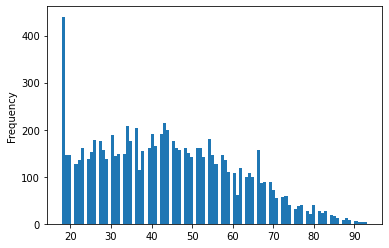

In [ ]:
df[['c_id', 'c_age']].drop_duplicates().c_age.plot(kind='hist', bins=100)

on ajoute un flag 'age irrelevant'

In [ ]:
df.loc[df.c_age == 18, 'data_info'] = 'age_irrelevant'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


#### On exprime la date de différentes manières

In [ ]:
# mois d'achat
df['t_month'] = df['t_date'].dt.month
# début, fin du mois ? 0,1,2,3
df['t_month_part'] = (df['t_date'].dt.day / (df['t_date'].dt.days_in_month/4+1)).apply(lambda x: str(x)[0])
# jour de la semaine
df['t_weekday'] = df['t_date'].dt.dayofweek
# heure d'achat
df['t_hour'] = df['t_date'].dt.hour

#### On discrétise le prix

In [ ]:
def discretise_price(price):
    tranches = [
        {'bornes': (0,4),  'label': 'very_cheap 3-'},
        {'bornes': (4,10), 'label': 'cheap 4-9'},
        {'bornes': (10,20), 'label': 'medium 10-19'},
        {'bornes': (20,80), 'label': 'expensive 20-79'},
        {'bornes': (80,500), 'label': 'very_expansive 80+'}
    ]
    for t in tranches:
        if t['bornes'][0] <= price < t['bornes'][1]:
            return t['label']

In [ ]:
df['p_price_range'] = df['p_price'].apply(discretise_price)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<hr>

#### Enfin, renommage des colonnes

In [ ]:
df.head()

,c_id,c_sex,c_birth,p_id,p_price,p_cat,t_date,t_sess_id,data_info,t_buyer_age,t_buyer_age_range,c_age,c_age_range,t_month,t_month_part,t_weekday,t_hour,p_price_range
0,c_4410,f,1967.0,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707,NaN,54.0,51-70,55.0,51-70,3.0,2,0.0,1.0,expensive 20-79
1,c_4410,f,1967.0,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715,NaN,54.0,51-70,55.0,51-70,11.0,0,3.0,16.0,cheap 4-9
2,c_4410,f,1967.0,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707,NaN,54.0,51-70,55.0,51-70,3.0,2,0.0,1.0,medium 10-19
3,c_4410,f,1967.0,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236,NaN,54.0,51-70,55.0,51-70,8.0,1,2.0,8.0,medium 10-19
4,c_4410,f,1967.0,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740,NaN,55.0,51-70,55.0,51-70,1.0,2,1.0,17.0,medium 10-19


In [ ]:
df = df[[
    'c_id',
    'c_sex',
    'c_birth',
    'c_age',
    'c_age_range',
    
    'p_id',
    'p_cat',
    'p_price',
    'p_price_range',
    
    't_sess_id',
    't_buyer_age',
    't_buyer_age_range',
    
    't_date',
    't_hour',
    't_weekday',
    't_month_part',
    't_month',
    
    'data_info'
]]

In [ ]:
df

,c_id,c_sex,c_birth,c_age,c_age_range,p_id,p_cat,p_price,p_price_range,t_sess_id,t_buyer_age,t_buyer_age_range,t_date,t_hour,t_weekday,t_month_part,t_month,data_info
0,c_4410,f,1967.0,55.0,51-70,1_385,1.0,25.99,expensive 20-79,s_9707,54.0,51-70,2021-03-22 01:40:22.782925,1.0,0.0,2,3.0,NaN
1,c_4410,f,1967.0,55.0,51-70,0_1110,0.0,4.71,cheap 4-9,s_114715,54.0,51-70,2021-11-04 16:28:30.169021,16.0,3.0,0,11.0,NaN
2,c_4410,f,1967.0,55.0,51-70,0_1111,0.0,19.99,medium 10-19,s_9707,54.0,51-70,2021-03-22 01:27:49.480137,1.0,0.0,2,3.0,NaN
3,c_4410,f,1967.0,55.0,51-70,1_461,1.0,12.99,medium 10-19,s_74236,54.0,51-70,2021-08-11 08:40:47.495793,8.0,2.0,1,8.0,NaN
4,c_4410,f,1967.0,55.0,51-70,1_536,1.0,11.21,medium 10-19,s_151740,55.0,51-70,2022-01-18 17:05:07.468131,17.0,1.0,2,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337054,NaN,NaN,NaN,NaN,None,0_525,0.0,2.99,very_cheap 3-,NaN,NaN,None,NaT,NaN,NaN,n,NaN,NaN
337055,NaN,NaN,NaN,NaN,None,2_86,2.0,132.36,very_expansive 80+,NaN,NaN,None,NaT,NaN,NaN,n,NaN,NaN
337056,NaN,NaN,NaN,NaN,None,0_299,0.0,22.99,expensive 20-79,NaN,NaN,None,NaT,NaN,NaN,n,NaN,NaN
337057,NaN,NaN,NaN,NaN,None,0_510,0.0,23.66,expensive 20-79,NaN,NaN,None,NaT,NaN,NaN,n,NaN,NaN


# Projection et enregistrement

on créé 3 dataframe : 
- les produits invendus
- les cliens qui n'ont rien acheté
- toutes les transactions avec information des clients, 

In [ ]:
produits_invendus = df.loc[df['p_id'].isin(p_invendus_id), ['p_id', 'p_cat', 'p_price', 'p_price_range']]

In [ ]:
clients_sans_achat = df.loc[df['c_id'].isin(c_ss_achat_id), ['c_id', 'c_sex', 'c_birth', 'c_age', 'c_age_range']]

In [ ]:
transactions = df(['c_id', 'c_sex', 'c_birth', 'c_age', 'c_age_range', 'p_id', 'p_cat',
       'p_price', 'p_price_range', 't_sess_id', 't_buyer_age',
       't_buyer_age_range', 't_date', 't_hour', 't_weekday', 't_month_part',
       't_month'])

#### Enregistrement des données

In [ ]:
produits_invendus.to_csv('/content/drive/My Drive/dataset/clean_dataset/produits_invendus.csv', index=False)
clients_sans_achat.to_csv('/content/drive/My Drive/dataset/clean_dataset/clients_sans_achat.csv', index=False)
transactions.to_csv('/content/drive/My Drive/dataset/clean_dataset/transactions.csv', index=False)